In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix

from scipy.stats import ks_2samp
from scikitplot.metrics import plot_ks_statistic,plot_roc_curve

from sklearn.datasets import load_breast_cancer

import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',500)

In [2]:
data = load_breast_cancer()

In [3]:
df = pd.DataFrame(data['data'],columns=data.feature_names)

In [4]:
df['target'] =data.target

In [5]:
X = df[data.feature_names.tolist()].copy()
y = df['target'].copy()

In [13]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [10]:
Xt,Xv,yt,yv = train_test_split(X,y,train_size=0.7)

In [11]:
modelo = LogisticRegression(max_iter=5000)

In [12]:
modelo.fit(Xt,yt)

LogisticRegression(max_iter=5000)

In [9]:
print(accuracy_score(y_pred=modelo.predict(Xt),y_true=yt))
print(accuracy_score(y_pred=modelo.predict(Xv),y_true=yv))

0.949748743718593
0.9590643274853801


In [10]:
print(roc_auc_score(y_score=modelo.predict_proba(Xt)[:,1],y_true=yt))
print(roc_auc_score(y_score=modelo.predict_proba(Xv)[:,1],y_true=yv))

0.9928581163963472
0.9975602755453501


In [11]:
print(confusion_matrix(y_true=yt,y_pred=modelo.predict(Xt)))
print(confusion_matrix(y_true=yv,y_pred=modelo.predict(Xv)))

[[134  11]
 [  9 244]]
[[ 64   3]
 [  4 100]]


In [12]:
modelo.coef_

array([[ 0.88526962,  0.19115846, -0.22360333,  0.02013871, -0.18931874,
        -0.16130671, -0.48111347, -0.31009578, -0.25907949, -0.02567386,
        -0.10238395,  1.43380614, -0.29369107, -0.08244638, -0.02003637,
         0.12971211,  0.03669299, -0.02648851, -0.04241512,  0.02476704,
         0.33010037, -0.38245535, -0.05813659, -0.01810976, -0.3621947 ,
        -0.30435502, -1.06225229, -0.60022369, -0.66193825, -0.05668016]])

In [13]:
modelo.intercept_ 

array([20.13603615])

In [14]:
df['probabilidad'] = modelo.predict_proba(X)[:,1]

<AxesSubplot:>

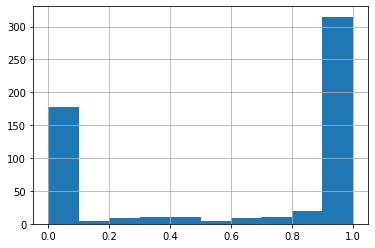

In [15]:
df.probabilidad.hist()

/home/oszwaldo/Documentos/Projects/env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)
/home/oszwaldo/Documentos/Projects/env/lib/python3.7/site-packages/sklearn/utils/deprecation.py:86: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

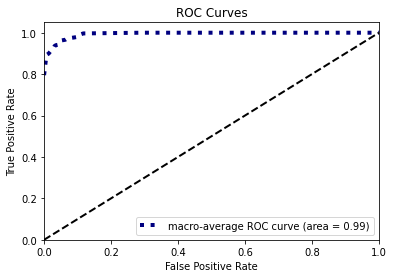

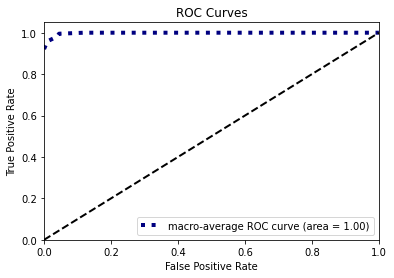

In [16]:
plot_roc_curve(y_true=yt,y_probas=modelo.predict_proba(Xt),curves='macro')
plot_roc_curve(y_true=yv,y_probas=modelo.predict_proba(Xv),curves='macro')

<AxesSubplot:title={'center':'KS Statistic Plot'}, xlabel='Threshold', ylabel='Percentage below threshold'>

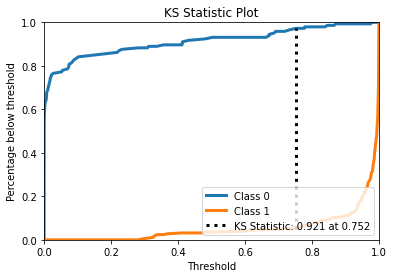

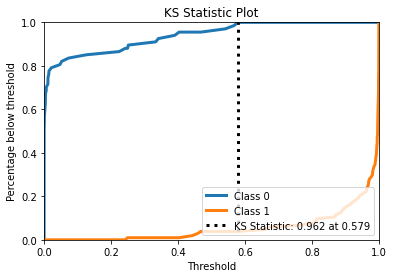

In [17]:
plot_ks_statistic(y_true=yt,y_probas=modelo.predict_proba(Xt))
plot_ks_statistic(y_true=yv,y_probas=modelo.predict_proba(Xv))

In [23]:
ks_2samp(df.loc[df.target==1].probabilidad,df.loc[df.target==0].probabilidad)

KstestResult(statistic=0.9258495851170657, pvalue=2.220446049250313e-16)

In [18]:
aux = df[['probabilidad','target']].copy()

In [21]:
aux['r_proba'] = pd.cut( aux['probabilidad'],bins=np.arange(0,1.1,0.1),include_lowest=True).astype(str)

In [23]:
aux = aux.pivot_table(index='r_proba',
                      columns='target',
                      values='probabilidad',
                      aggfunc='count',
                      fill_value=0)

In [43]:
aux

target,0,1,dif
r_proba,,,
"(-0.001, 0.1]",0.834906,0.000000,0.834906
"(0.1, 0.2]",0.853774,0.000000,0.853774
"(0.2, 0.3]",0.886792,0.005602,0.881190
"(0.3, 0.4]",0.910377,0.022409,0.887968
"(0.4, 0.5]",0.933962,0.036415,0.897548
"(0.5, 0.6]",0.952830,0.036415,0.916416
"(0.6, 0.7]",0.971698,0.050420,0.921278
"(0.7, 0.8]",0.985849,0.072829,0.913020
"(0.8, 0.9]",0.995283,0.120448,0.874835


In [34]:
for i in range(2):
    aux[i]=aux[i].cumsum()
    aux[i]/=aux[i].max()

In [35]:
aux['dif'] = np.abs(aux[0]-aux[1])

<AxesSubplot:xlabel='r_proba'>

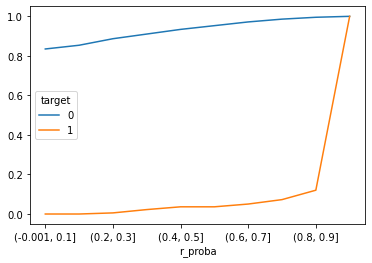

In [36]:
aux[range(2)].plot()

In [37]:
ks = aux['dif'].max()
print(ks)

0.9212779451403202
